# Customer Ad Click Prediction

# Table of Contents
1. [Problem Definition](#Problem-Definition)
2. [Importing Basic Libraries](#Importing-Basic-Libraries)
3. [Loading Dataset](#Loading-Dataset)
4. [EDA (Exploratory Data Analysis) and Feature Engineering](#Exploratory-Data-Analysis-and-Feature-Engineering)
5. [Model Training and Evaluation](#Model-Training-and-Evaluation)
6. [Conclusion](#Conclusion)

# Problem Definition

In the age of digital marketing, accurately predicting whether a customer will click on an advertisement is critical for optimizing ad campaigns and increasing **return on investment (ROI)**. Advertisers aim to present their ads to the most relevant audience to improve engagement and conversion rates while minimizing wasted ad spend. The ability to predict ad clicks can lead to better targeting strategies, personalized content delivery, and more efficient allocation of marketing budgets.

This project focuses on building a machine learning model to predict whether a customer will click on an advertisement based on their demographic, behavioral, and contextual data. By analyzing historical data, we aim to uncover patterns and relationships that can effectively classify user behavior.

# Importing Basic Libraries

In [1198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Dataset

[Ad Click Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset)

In [1199]:
df = pd.read_csv('ad_click_dataset.csv')

### Features

- **id**: Unique identifier for each record or user.

- **full_name**: Name of the user.

- **age**: Age of the user, which may influence ad-click behavior.

- **gender**: Gender of the user, potentially affecting ad preferences.

- **device_type**: Type of device used (e.g., mobile, desktop) to view the ad.

- **ad_position**: Position of the ad on the webpage (e.g., top, bottom).

- **browsing_history**: User’s browsing history, indicating interests or intent.

- **time_of_day**: Time when the ad was shown (e.g., morning, evening).

- **click**: Target variable indicating whether the user clicked the ad (1 = clicked, 0 = not clicked).

# Exploratory Data Analysis and Feature Engineering

### Data Summary

In [1200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [1201]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [1202]:
df.describe(include='all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
count,10000.000000,10000,5234.000000,5307,8000,8000,5218,8000,10000.000000
unique,NaN,4000,NaN,3,3,3,5,4,NaN
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN
freq,NaN,25,NaN,1834,2754,2817,1175,2126,NaN
mean,5060.211400,NaN,40.197363,NaN,NaN,NaN,NaN,NaN,0.650000
std,2861.758265,NaN,13.126420,NaN,NaN,NaN,NaN,NaN,0.476993
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5218.000000,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,7466.000000,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [1203]:
for feature in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {feature}: {df[feature].unique()}")

Unique values in full_name: ['User670' 'User3044' 'User5912' ... 'User7843' 'User3914' 'User3056']
Unique values in gender: [nan 'Male' 'Non-Binary' 'Female']
Unique values in device_type: ['Desktop' nan 'Mobile' 'Tablet']
Unique values in ad_position: ['Top' 'Side' nan 'Bottom']
Unique values in browsing_history: ['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']
Unique values in time_of_day: ['Afternoon' nan 'Night' 'Evening' 'Morning']


- id: It is a unique identifier with no predictive power and can cause overfitting.

In [1204]:
df = df.drop(columns=['id'])

### Handling Missing Values

In [1205]:
missing_values = df.isnull().sum()
print(missing_values)

full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


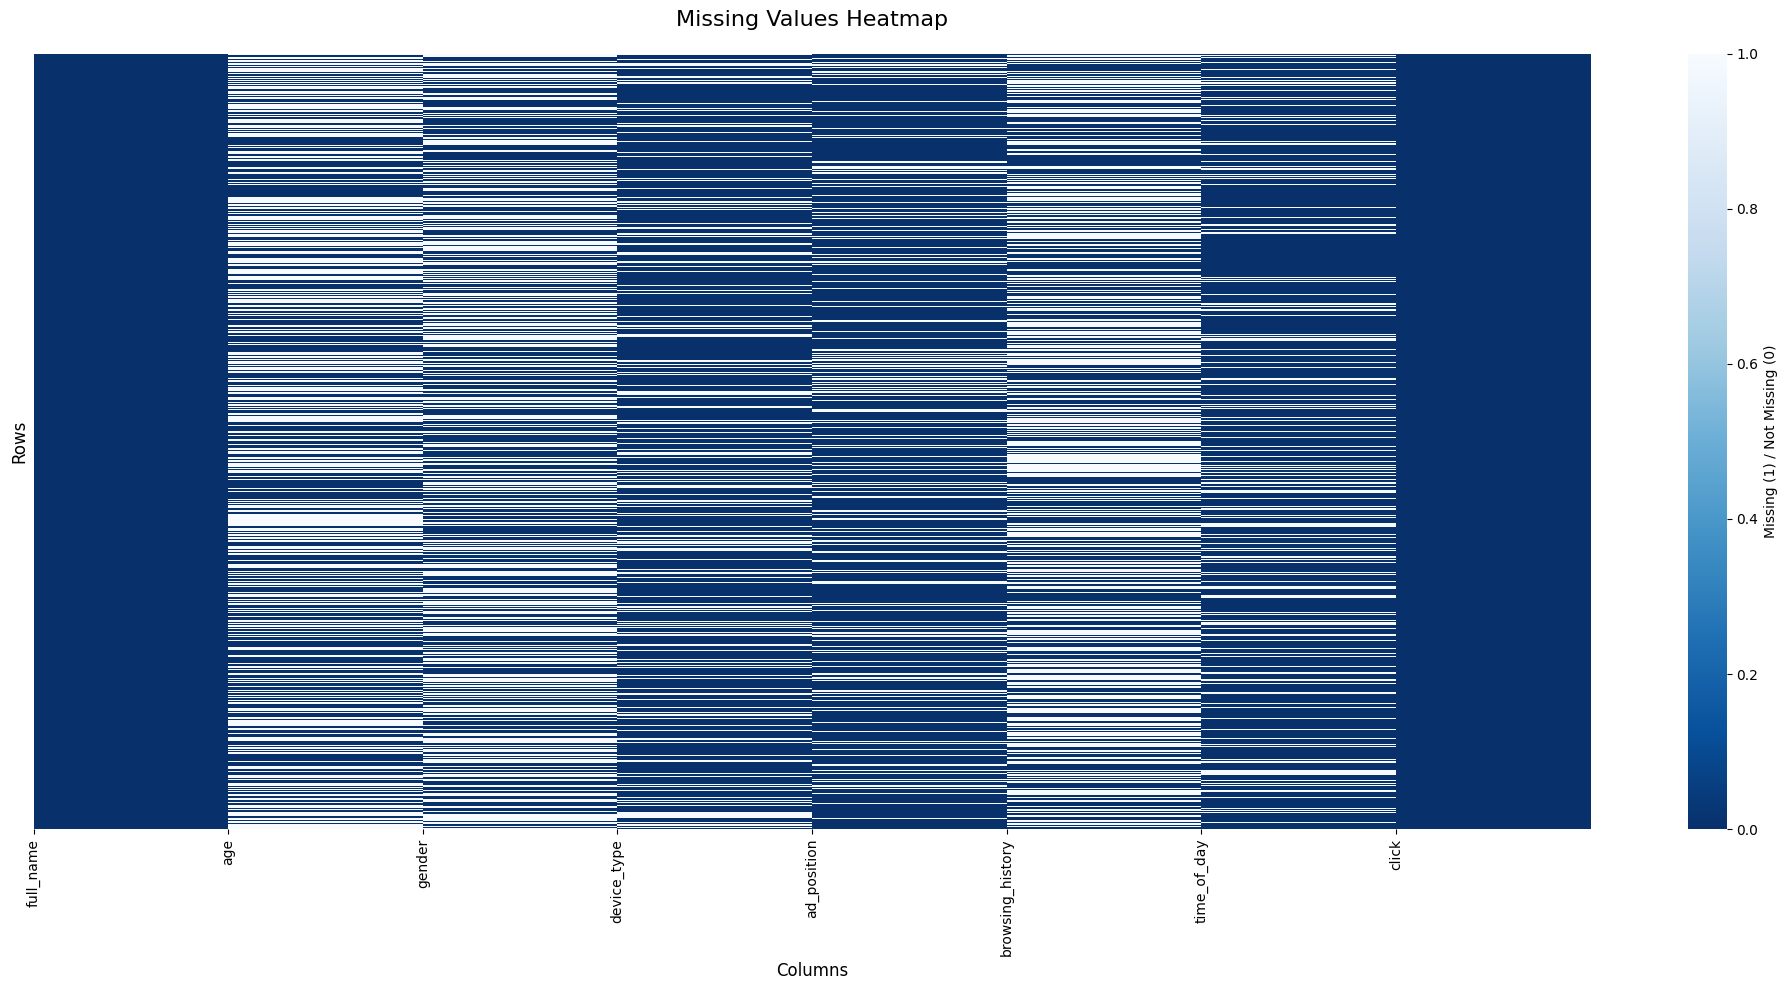

In [1206]:
missing_matrix = df.isnull().astype(int)

plt.figure(figsize=(20, 10))

sns.heatmap(
    missing_matrix, 
    cmap='Blues_r',
    cbar_kws={'label': 'Missing (1) / Not Missing (0)'},
    yticklabels=False
)


plt.title("Missing Values Heatmap", fontsize=16, pad=20)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.xticks(range(len(df.columns)), df.columns, rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

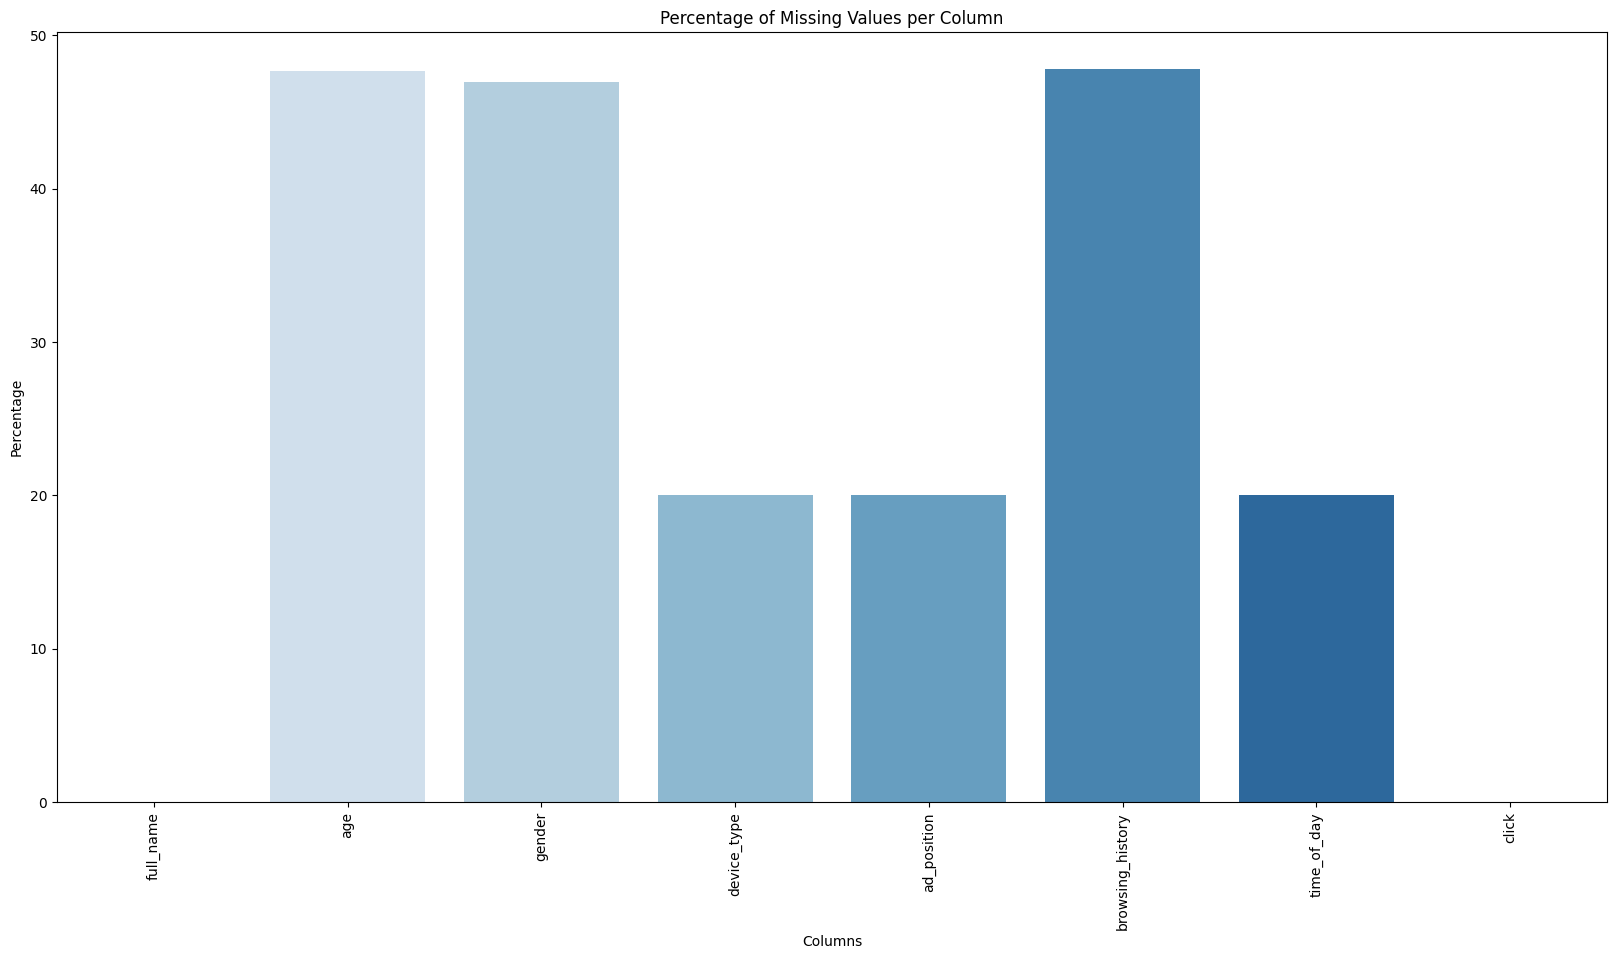

In [1207]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(20, 10))
sns.barplot(x=missing_percentage.index, y=missing_percentage, hue=missing_percentage.index, palette='Blues', legend=False)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

<Axes: >

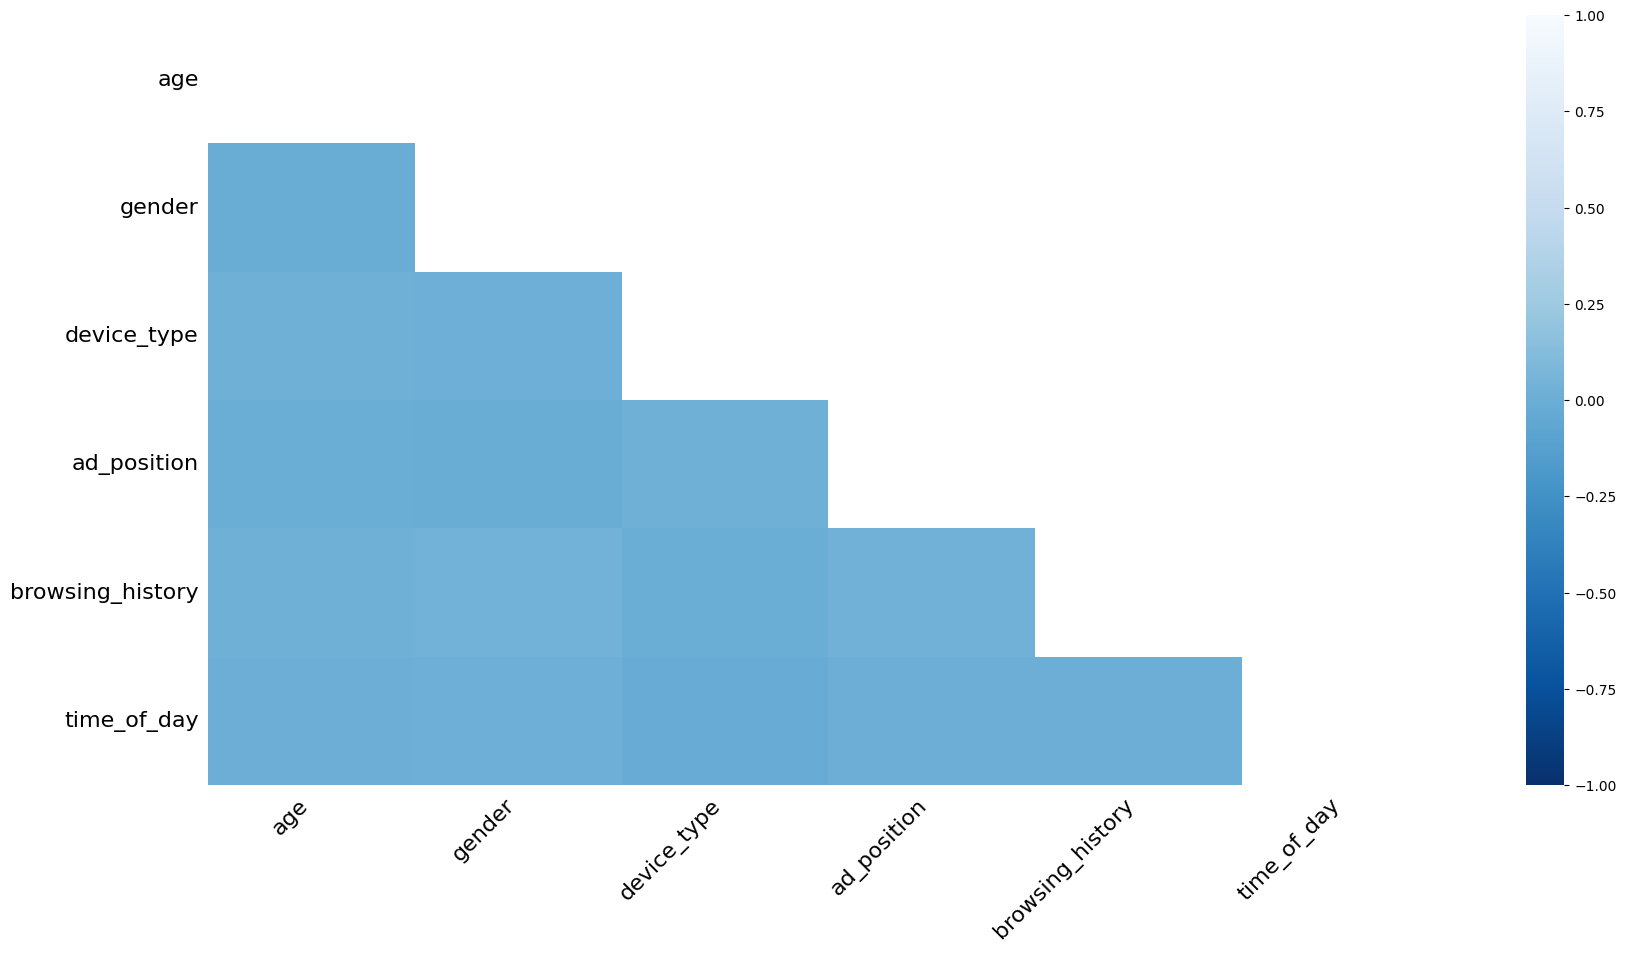

In [1208]:
import missingno as msno
msno.heatmap(df, figsize=(20,10), fontsize=16, cmap='Blues_r')

The missingness is **MCAR (Missing Completely At Random)**, meaning the probability of a value being missing is unrelated to any other observed or unobserved data.

1. **Categorical Columns**
   
Pattern: Missing values in categorical columns are first handled using forward fill (ffill) and backward fill (bfill) within each full_name group. If all values in a group are missing, they are replaced with 'Unknown'.

Reason: This approach ensures that missing values are filled using available data within the same group whenever possible. If an entire group has missing values, replacing them with 'Unknown' preserves the pattern of missingness, which could be meaningful for analysis or modeling.

2. **Numeric Column (age)**
   
Pattern: Missing values in the age column are first filled within each full_name group using forward fill (ffill) and backward fill (bfill). If all values for a person are missing, the global mean age is used.

Reason: This ensures that imputed values remain contextually relevant and consistent within each person's data. The multi-step imputation process prevents unnecessary loss of information while maintaining statistical integrity.

In [1209]:
for col in df.columns:
    df[col] = df.groupby('full_name', group_keys=False)[col].apply(lambda x: x.ffill().bfill())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('Unknown')

global_mean = df['age'].mean(skipna=True)
df['age'] = df.groupby('full_name')['age'].transform(
    lambda x: x.fillna( global_mean)
)
print(df.isnull().sum())

full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


### Checking And Removing Duplicates

In [1210]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 6000


In [1211]:
df['num_clicks'] = df.groupby(df.columns.tolist())['click'].transform('count')
df = df.drop_duplicates()
df.shape

(4000, 9)

Duplicate rows in the dataset were not errors but instead represented meaningful information about the number of clicks on identical records. To preserve this insight, a new feature, num_clicks, was created before removing duplicates.

In [1212]:
df.head()

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,num_clicks
0,User670,22.0,Unknown,Desktop,Top,Shopping,Afternoon,1,17
1,User3044,34.0,Male,Desktop,Top,News,Night,1,11
2,User5912,41.0,Non-Binary,Mobile,Side,Education,Night,1,13
3,User5418,34.0,Male,Mobile,Top,Entertainment,Evening,1,18
4,User9452,39.0,Non-Binary,Unknown,Unknown,Social Media,Morning,0,1


After grouping and handling missing values and duplicates, we don't need 'full_name'

In [1213]:
df = df.drop(columns='full_name')

### Detecting and Handling Outliers

In [1214]:
from scipy.stats import zscore

def detect_outliers_zscore(column, threshold=3):
    z_scores = zscore(column)
    outliers = column[np.abs(z_scores) > threshold]
    return outliers

outlier_counts = {}
for column in numerical_cols:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = len(outliers)
    print(f"Number of outliers in {column}: {len(outliers)}")

for column, count in outlier_counts.items():
    if count > 0:
        print(f"Outliers in {column}: {detect_outliers_zscore(df[column]).values}")

Number of outliers in age: 0
Number of outliers in click: 0


### Analyzing the Distribution of Features

In [1215]:
features = df.drop('click', axis=1)
target = df['click']

numerical_features = features.select_dtypes(include=['number'])
categorical_features = features.select_dtypes(exclude=['number'])

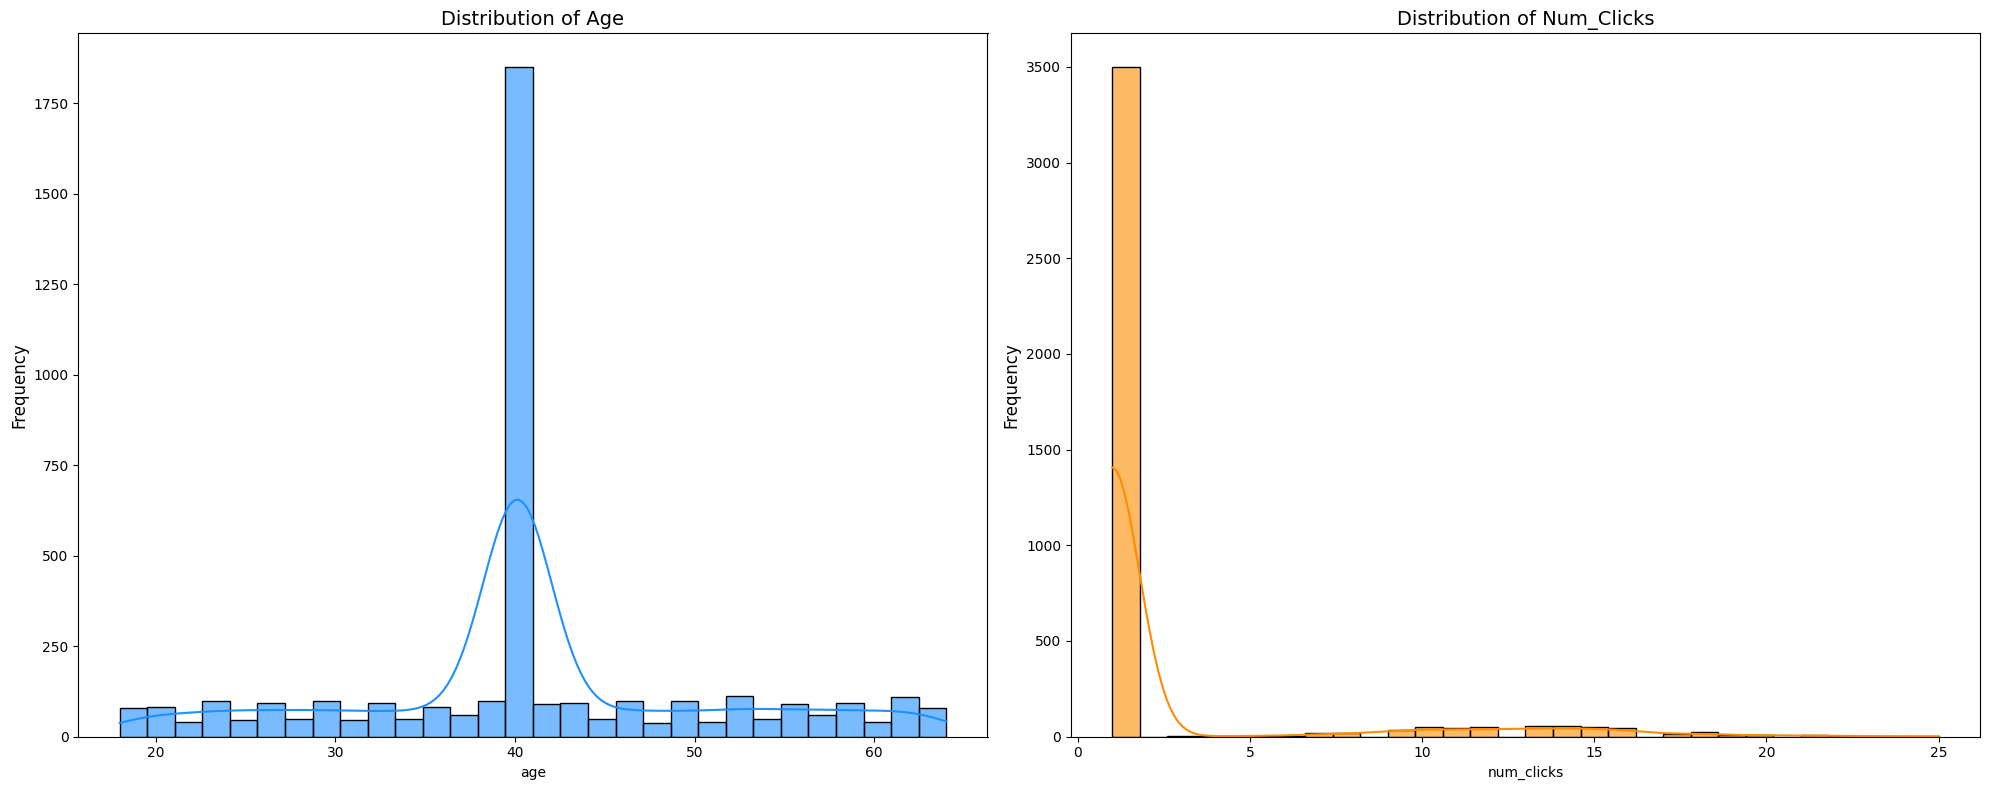

In [1216]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=df, x='age', kde=True, bins=30, color='dodgerblue', alpha=0.6, ax=axes[0])
axes[0].set_title('Distribution of Age', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df, x='num_clicks', kde=True, bins=30, color='darkorange', alpha=0.6, ax=axes[1])
axes[1].set_title('Distribution of Num_Clicks', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [1217]:
# Check skewness for each feature
skewness = numerical_features.skew()
print("Skewness of Features:")
print(skewness)

Skewness of Features:
age           0.131416
num_clicks    2.693273
dtype: float64


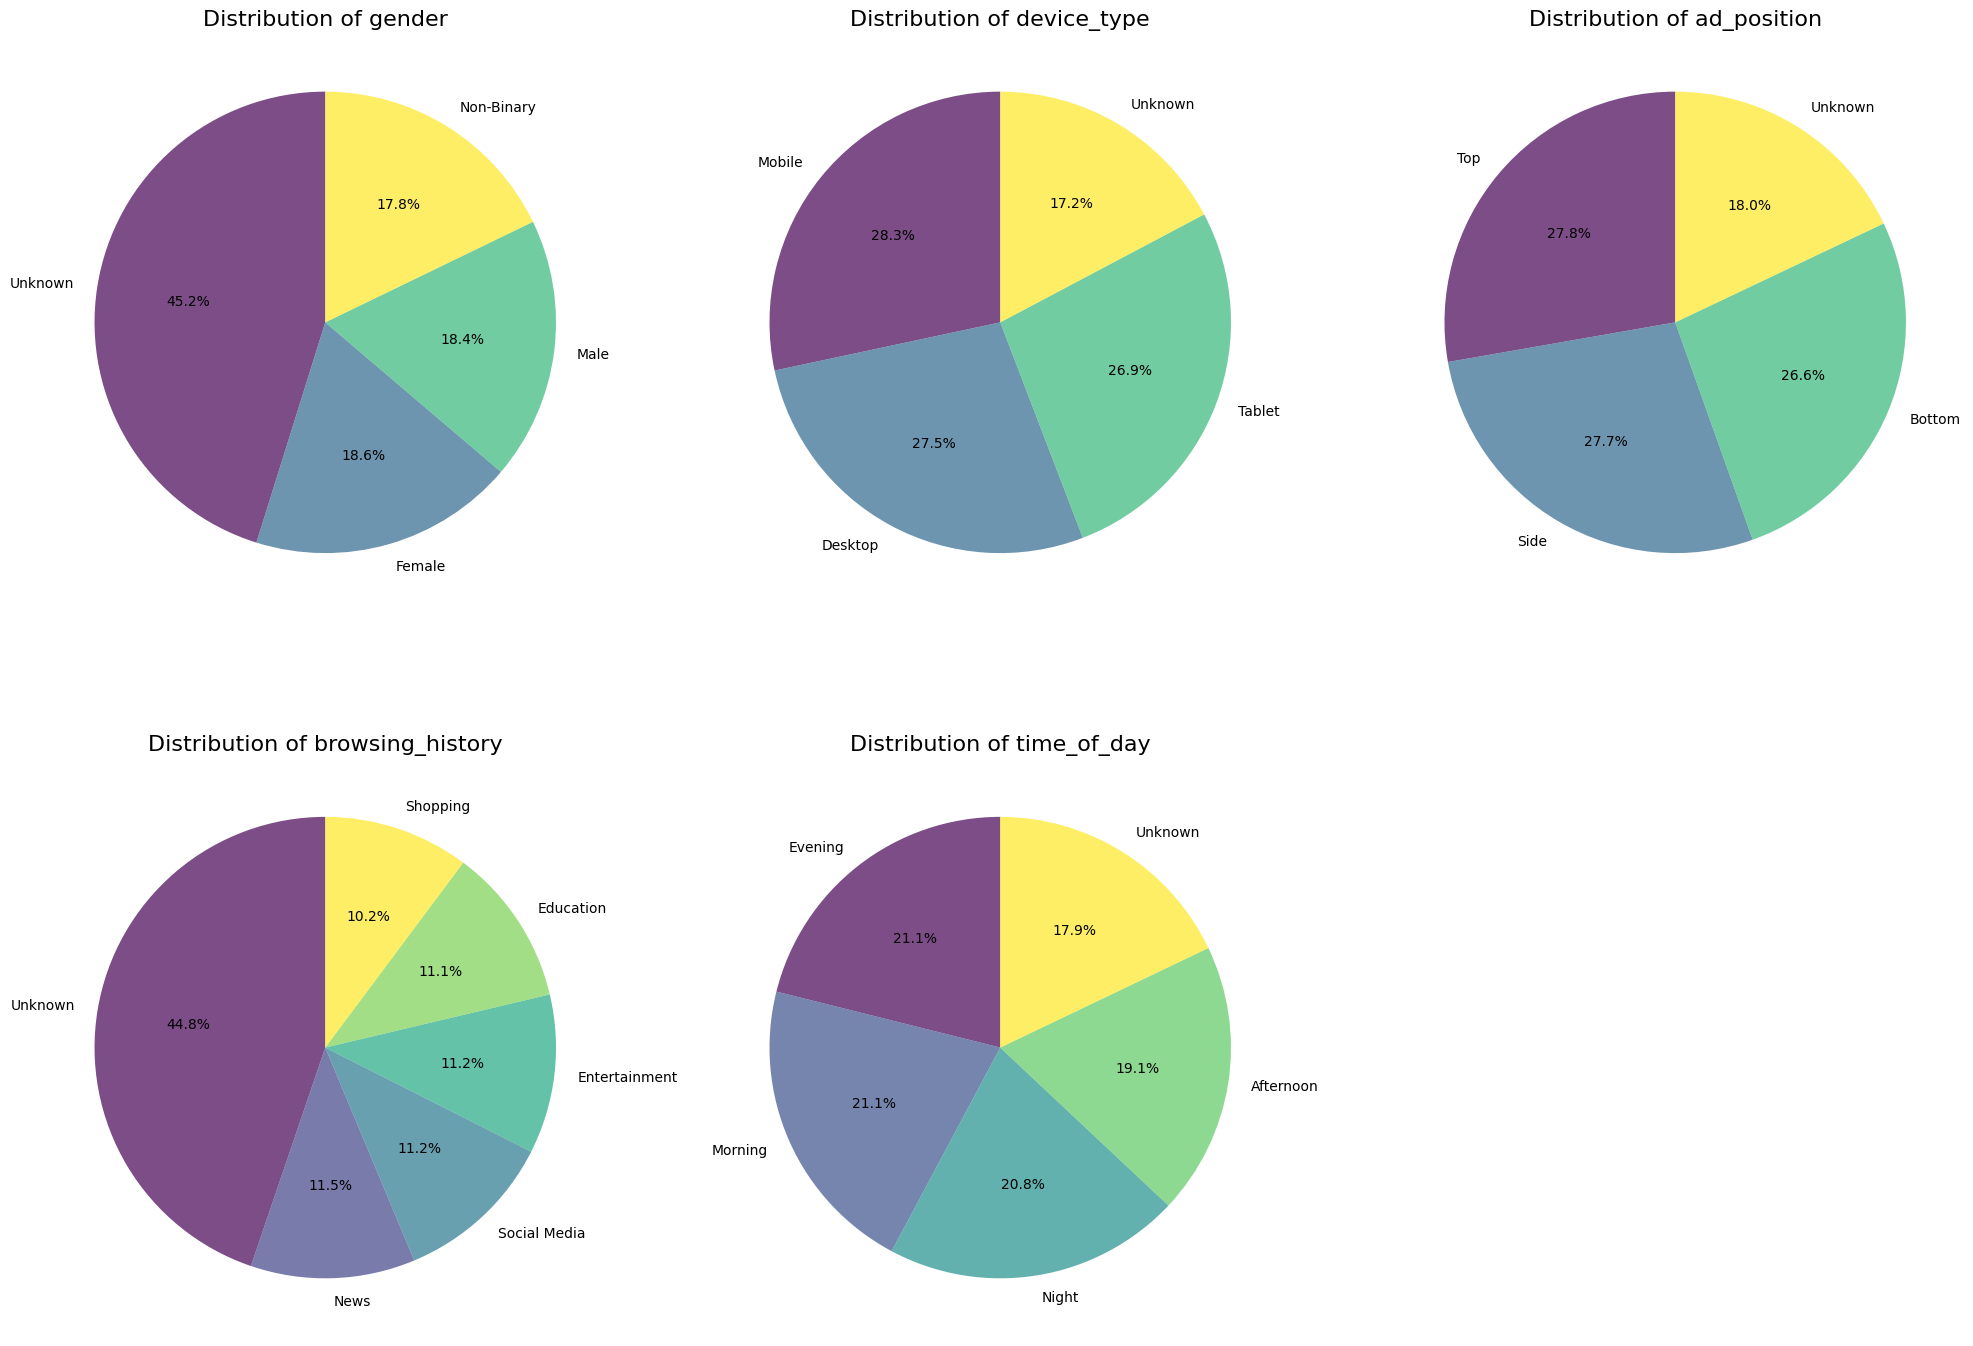

In [1218]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 3, i)
    
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', wedgeprops={'alpha': 0.7})
    
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.ylabel('')  # Remove default ylabel

plt.tight_layout()
plt.show()


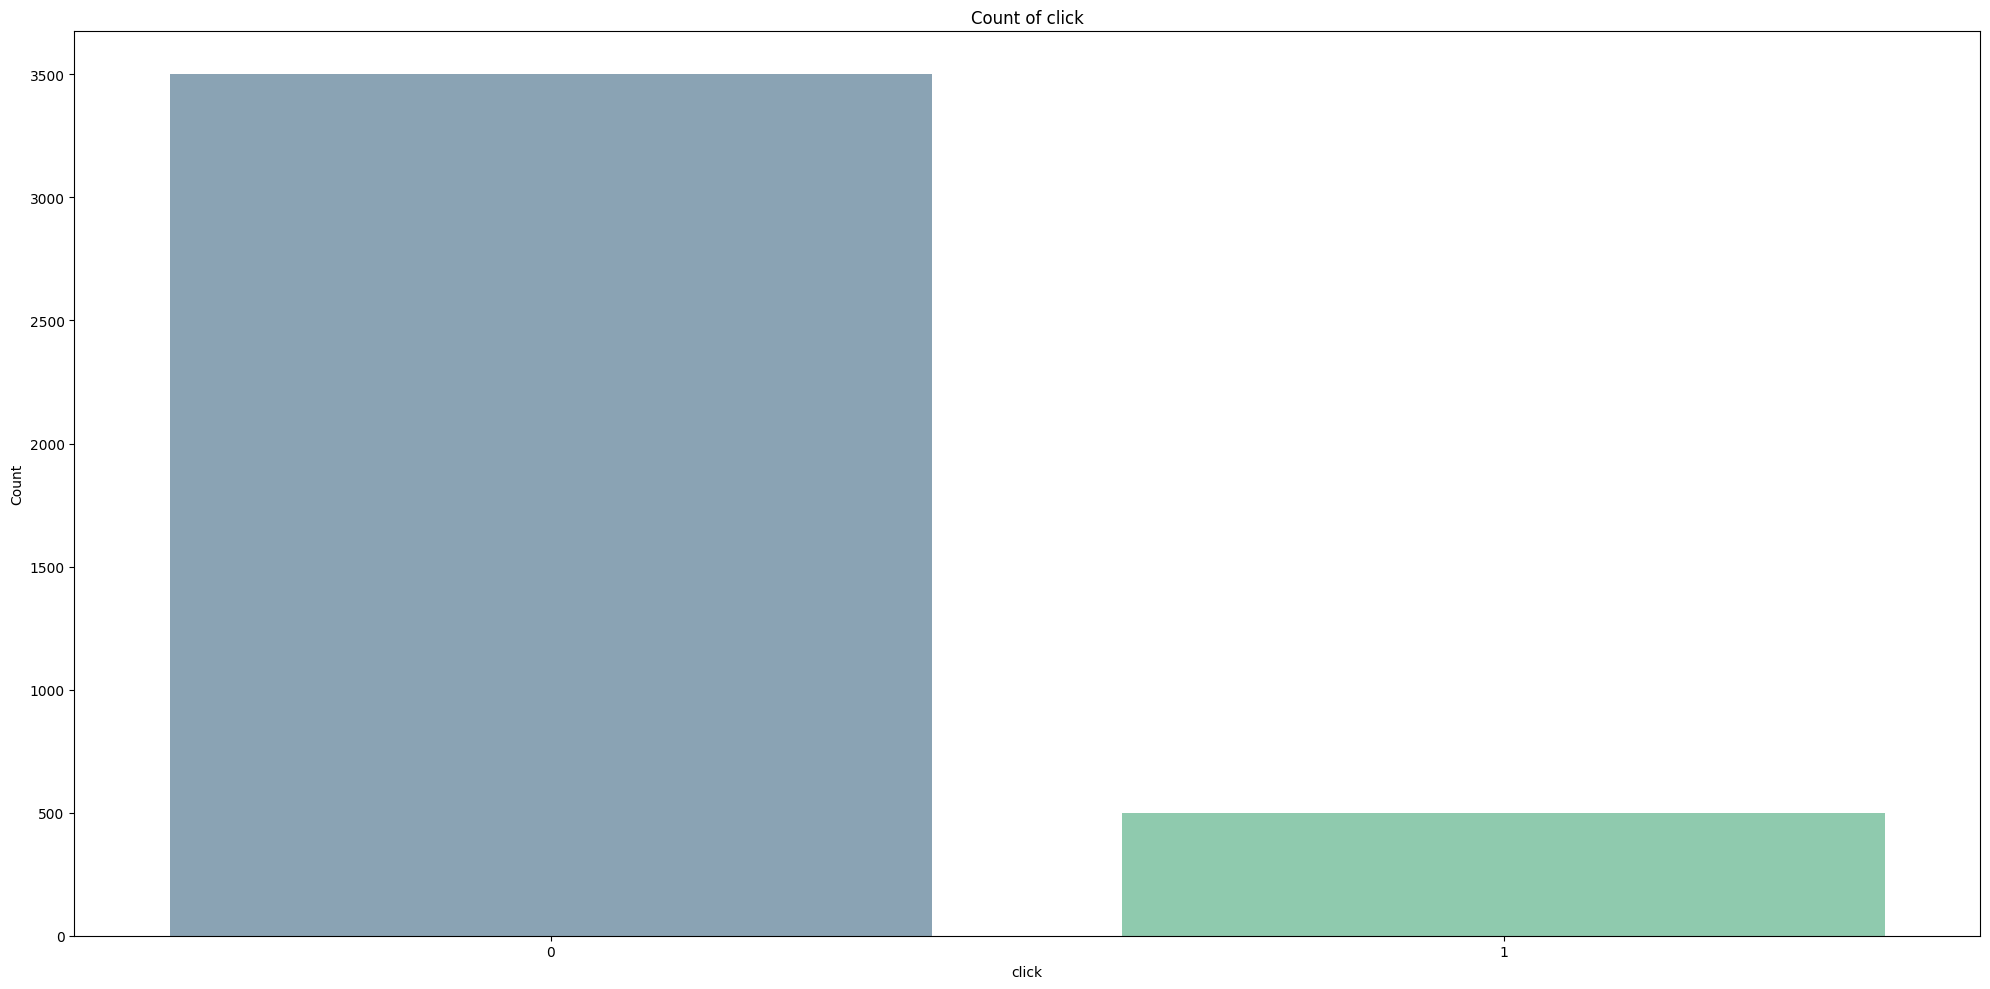

In [1219]:
plt.figure(figsize=(20, 10))
    
sns.countplot(data=df, x=df['click'], hue=df['click'], palette='viridis', alpha=0.6, legend=False)
plt.title(f'Count of click', fontsize=12)
plt.xlabel('click', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

The target variable is imbalanced. We will use **SMOTE** to handle this.

### Encoding Categorical Features

In [1220]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cols = encoder.fit_transform(df[categorical_cols])

df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, df_encoded], axis=1)

print("\nOne-Hot Encoded DataFrame using sklearn:")
df.head()


One-Hot Encoded DataFrame using sklearn:


,age,click,num_clicks,gender_Male,gender_Non-Binary,gender_Unknown,device_type_Mobile,device_type_Tablet,device_type_Unknown,ad_position_Side,...,ad_position_Unknown,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,browsing_history_Unknown,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_Unknown
0,22.0,1,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,1,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.0,1,13,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,34.0,1,18,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,39.0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Relation of features

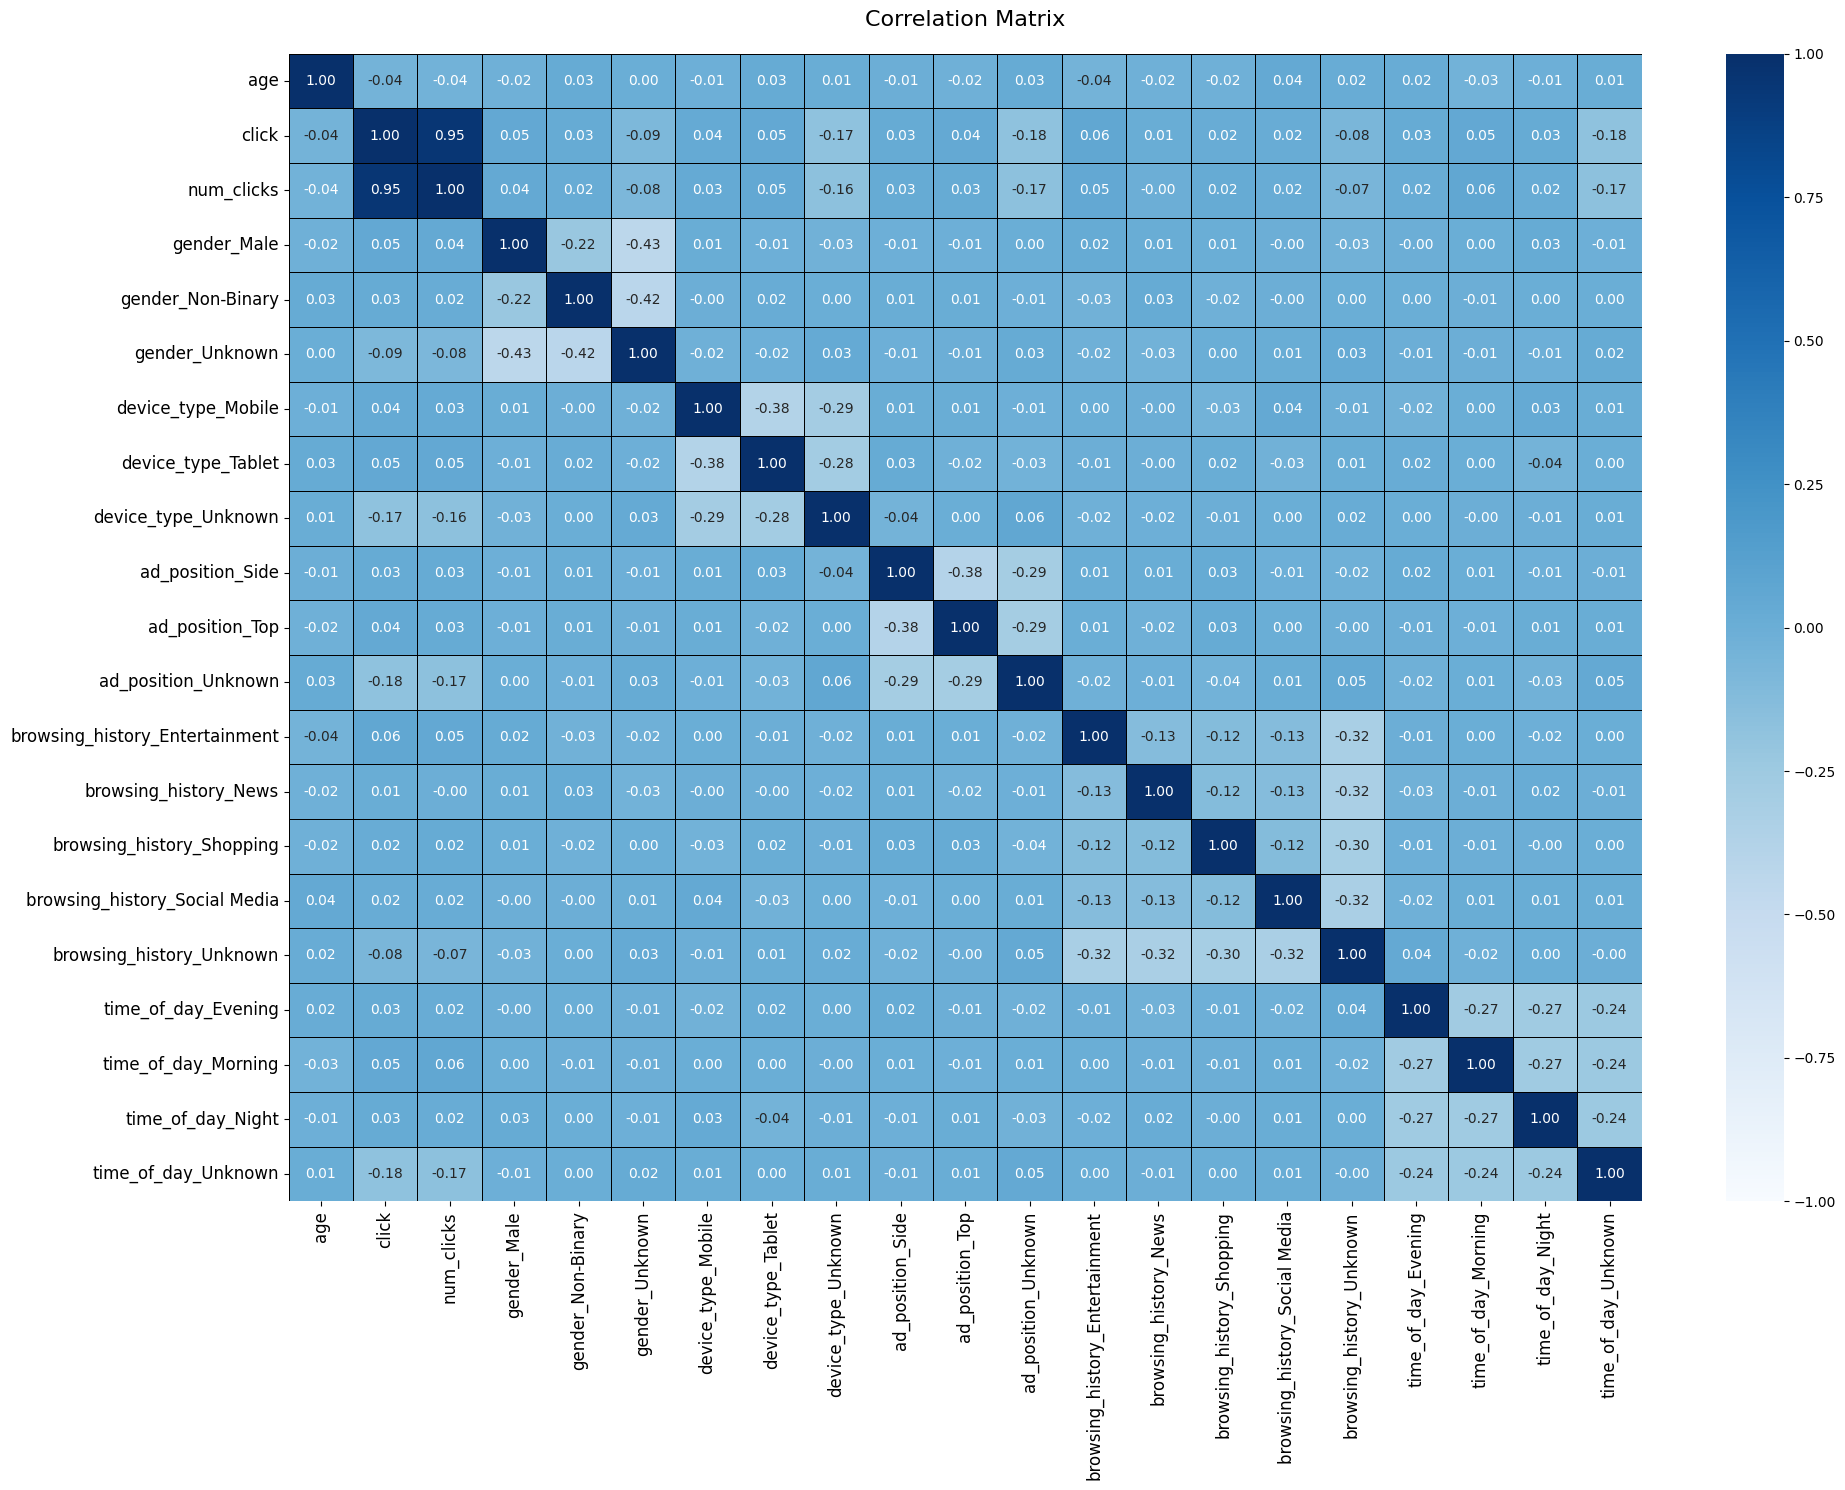

In [1221]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",
    cmap='Blues',
    vmin=-1,
    vmax=1,
    linewidths=0.7,
    linecolor='black'
)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

As you can see, the 'num_clicks' has a high relation with the target variable. So our new feature was a great idea!

### Feature Scaling and Final Data Preparation

In [1222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(['click'], axis=1)
y = df['click']

# training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Print shapes to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5250, 20) (5250,)
Test set shape: (1000, 20) (1000,)


# Model Training and Evaluation

We will use SVM with the kernel of RBF:

In [1223]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:")
print(conf_matrix)

Train Accuracy: 0.9998
Test Accuracy: 0.9980

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       1.00      0.98      0.99       125

    accuracy                           1.00      1000
   macro avg       1.00      0.99      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
[[875   0]
 [  2 123]]


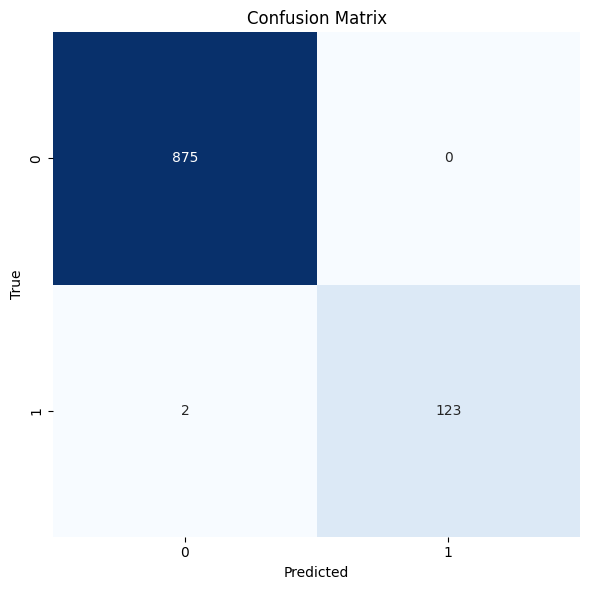

In [1224]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

plt.show()

# Conclusion

The model achieved outstanding performance, making it suitable for real-world ad click prediction tasks.
Robust preprocessing techniques, including handling missing values and creating new features, played a key role in the model's success.

By leveraging this model, advertisers can optimize their strategies, improving targeting, maximizing ad engagement, and ultimately driving better results for ad campaigns.